# Ensemble Vis


In [229]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
import os
import sys
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

# Load predictions

In [231]:
!ls jet_tagger/jsc

adaboost             averaging            bagging_independent
adaboost_independent bagging


In [232]:
!ls jet_tagger/jsc/averaging/

averaging_large_ensemble_size16_model_10_predictions.csv
averaging_large_ensemble_size16_model_11_predictions.csv
averaging_large_ensemble_size16_model_12_predictions.csv
averaging_large_ensemble_size16_model_13_predictions.csv
averaging_large_ensemble_size16_model_14_predictions.csv
averaging_large_ensemble_size16_model_15_predictions.csv
averaging_large_ensemble_size16_model_16_predictions.csv
averaging_large_ensemble_size16_model_1_predictions.csv
averaging_large_ensemble_size16_model_2_predictions.csv
averaging_large_ensemble_size16_model_3_predictions.csv
averaging_large_ensemble_size16_model_4_predictions.csv
averaging_large_ensemble_size16_model_5_predictions.csv
averaging_large_ensemble_size16_model_6_predictions.csv
averaging_large_ensemble_size16_model_7_predictions.csv
averaging_large_ensemble_size16_model_8_predictions.csv
averaging_large_ensemble_size16_model_9_predictions.csv
jsc_loss=0.689_eval_accuracy.txt


# load prediction `.csv`

In [14]:
file_name = "jet_tagger/jsc/adaboost/model_1_predictions.csv"

df_model = pd.read_csv(file_name)
df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
df_model = df_model.assign(sample_index_original = df_model.index)
df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
df_model = df_model.assign(sample_index = df_model.index)
df_model

,0,1,2,3,4,prediction,target,sample_index_original,sample_index
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,346,0
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1
2,0.786713,0.082173,0.002774,0.011383,0.116956,0,0,255,2
3,0.029756,0.020906,0.002184,0.001241,0.945914,4,0,117,3
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4
...,...,...,...,...,...,...,...,...,...
749,0.006557,0.005694,0.001123,0.001489,0.985138,4,4,612,749
750,0.051536,0.014463,0.001621,0.000989,0.931391,4,4,295,750
751,0.006527,0.009970,0.001381,0.001482,0.980640,4,4,294,751
752,0.410507,0.115202,0.152790,0.132672,0.188829,0,4,586,752


,0,1,2,3,4,pred,target_label,sample_index_original,sample_index
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,0,0
1,0.766908,0.114013,0.005879,0.092252,0.020948,0,0,100,1
2,0.105831,0.466074,0.230073,0.186160,0.011863,1,0,99,2
3,0.627179,0.037242,0.001667,0.001667,0.332244,0,0,98,3
4,0.902833,0.057532,0.010571,0.014020,0.015045,0,0,97,4
...,...,...,...,...,...,...,...,...,...
749,0.006480,0.020049,0.733998,0.144723,0.094751,2,4,654,749
750,0.054992,0.016561,0.001502,0.000854,0.926091,4,4,655,750
751,0.396480,0.225394,0.004031,0.004642,0.369453,0,4,656,751
752,0.002638,0.003498,0.001131,0.000599,0.992135,4,4,658,752


## process all predictions

In [244]:


# which models to load
model_names = ["averaging", "bagging_independent", "adaboost_independent"]

# initialize dataframe
df_results = pd.DataFrame()

# loop over hyperparameters
for model_name in model_names:
    
    # find all ensemble member prediction files
    glob_str = f"jet_tagger/jsc/{model_name}/{model_name.replace('_independent','')}_large_*_model_*_predictions.csv"
    file_names = list(sorted(glob(glob_str)))

    # loop over ensemble members
    for file_name in file_names:
        
        # parse model index
        model_index = int(file_name.split("_model_")[-1].split("_predictions")[0])
        
        # display file info
        print(f"[+] {file_name} ({model_index=})")
        
        # load prediction file
        df_model = pd.read_csv(file_name)

        df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
        df_model = df_model.assign(sample_index_original = df_model.index)
        df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
        df_model = df_model.assign(sample_index = df_model.index)

        df_model = df_model.assign(model_index = model_index)
        df_model = df_model.assign(model_name = model_name)

        df_results = pd.concat([df_results, df_model], ignore_index=True, axis=0)

        
        
# sort results by model_name, model_index
df_results = df_results.sort_values(['model_name', 'model_index']).reset_index(drop=True)

# show df
df_results

[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_10_predictions.csv (model_index=10)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_11_predictions.csv (model_index=11)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_12_predictions.csv (model_index=12)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_13_predictions.csv (model_index=13)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_14_predictions.csv (model_index=14)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_15_predictions.csv (model_index=15)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_16_predictions.csv (model_index=16)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_1_predictions.csv (model_index=1)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_2_predictions.csv (model_index=2)
[+] jet_tagger/jsc/averaging/averaging_large_ensemble_size16_model_3_predicti

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,346,0,1,adaboost_independent
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost_independent
2,0.786713,0.082173,0.002774,0.011383,0.116956,0,0,255,2,1,adaboost_independent
3,0.029756,0.020906,0.002184,0.001241,0.945914,4,0,117,3,1,adaboost_independent
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4,1,adaboost_independent
...,...,...,...,...,...,...,...,...,...,...,...
60315,0.011150,0.008501,0.000908,0.001190,0.978251,4,4,612,749,32,bagging_independent
60316,0.060051,0.030486,0.001892,0.003483,0.904088,4,4,295,750,32,bagging_independent
60317,0.006975,0.006091,0.001680,0.001570,0.983684,4,4,294,751,32,bagging_independent
60318,0.524125,0.126224,0.073386,0.073386,0.202881,0,4,586,752,32,bagging_independent


In [245]:
df_results

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,346,0,1,adaboost_independent
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost_independent
2,0.786713,0.082173,0.002774,0.011383,0.116956,0,0,255,2,1,adaboost_independent
3,0.029756,0.020906,0.002184,0.001241,0.945914,4,0,117,3,1,adaboost_independent
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4,1,adaboost_independent
...,...,...,...,...,...,...,...,...,...,...,...
60315,0.011150,0.008501,0.000908,0.001190,0.978251,4,4,612,749,32,bagging_independent
60316,0.060051,0.030486,0.001892,0.003483,0.904088,4,4,295,750,32,bagging_independent
60317,0.006975,0.006091,0.001680,0.001570,0.983684,4,4,294,751,32,bagging_independent
60318,0.524125,0.126224,0.073386,0.073386,0.202881,0,4,586,752,32,bagging_independent


## define which samples to use

In [246]:
np.random.seed(0)

n_classes = 5
n_samples = 20
n_samples_per_class = n_samples//n_classes

# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))

use_samples

[8,
 26,
 78,
 86,
 143,
 149,
 248,
 266,
 366,
 381,
 420,
 441,
 488,
 526,
 578,
 592,
 618,
 684,
 697,
 702]

In [247]:
np.random.seed(0)

df = df_results.copy()
df = df.loc[df.model_name.isin(['adaboost_independent'])]
# df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 20))]
df = df.loc[df.sample_index.isin(use_samples)]
df = df.sort_values('target')
df
df.groupby('target').count()

,0,1,2,3,4,prediction,sample_index_original,sample_index,model_index,model_name
target,,,,,,,,,,
0,128,128,128,128,128,128,128,128,128,128
1,128,128,128,128,128,128,128,128,128,128
2,128,128,128,128,128,128,128,128,128,128
3,128,128,128,128,128,128,128,128,128,128
4,128,128,128,128,128,128,128,128,128,128


## ploy Joy Division style plot

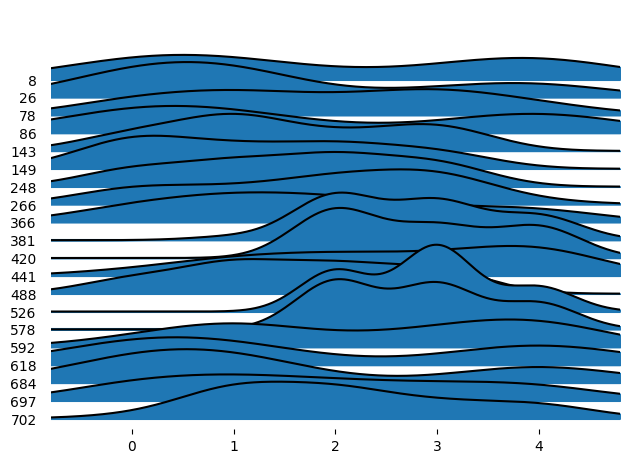

In [248]:
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction")

<AxesSubplot: xlabel='prediction', ylabel='Density'>

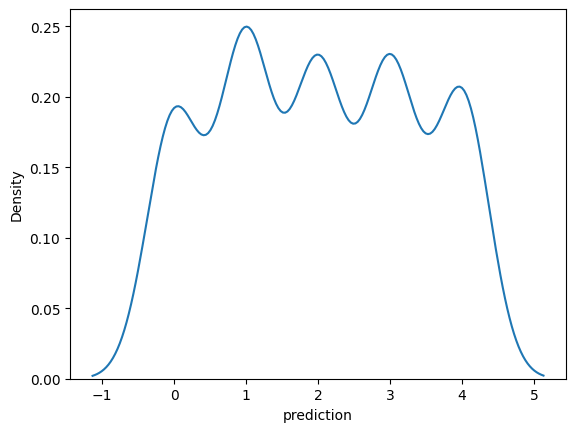

In [249]:
sns.kdeplot(df, x="prediction")

## ploy Joy Division style plot

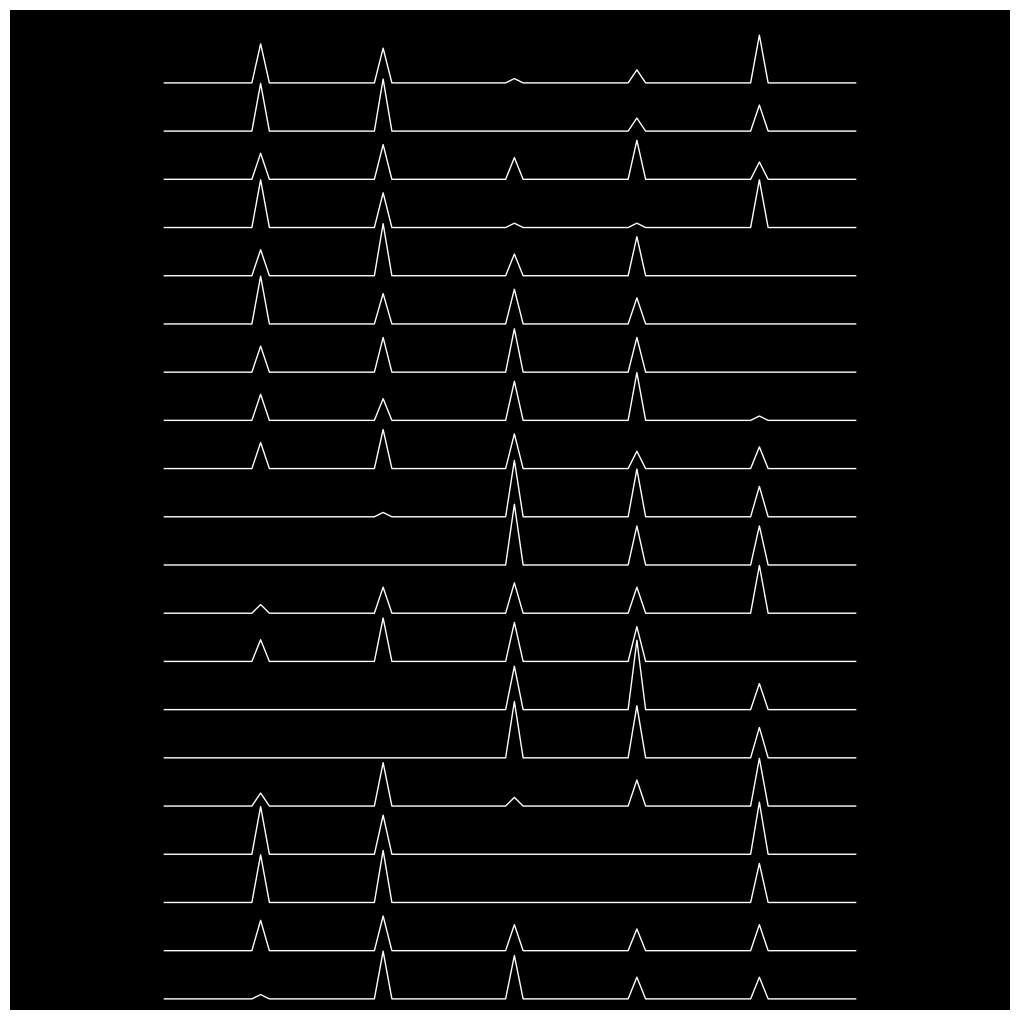

In [250]:
%matplotlib inline

labels = df.target.tolist()
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                        fill=False, background='k', linecolor="w", linewidth=1, 
                        grid="y", ylabels=False, xlabels=False, 
                        legend=False, overlap=0.5, figsize=(10,10), kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    # a.set_xlim([-1,5])   
    a.set_xlim([-2,6])   


## multiple plots


model_name=averaging


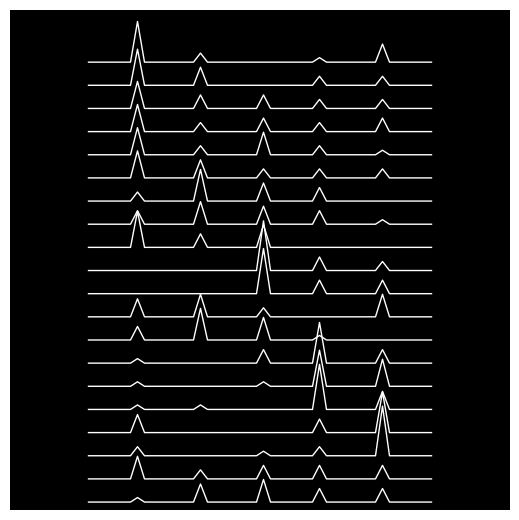

model_name=bagging_independent


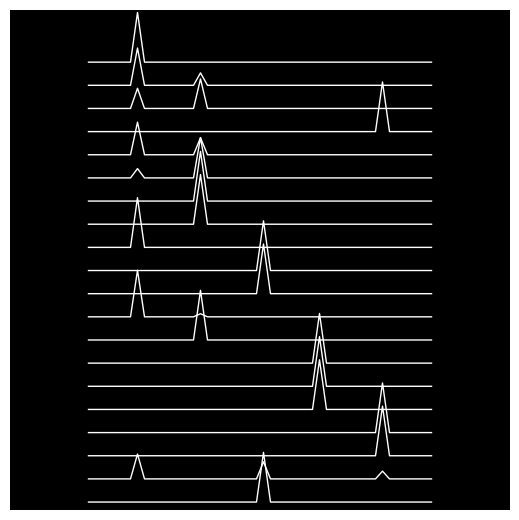

model_name=adaboost_independent


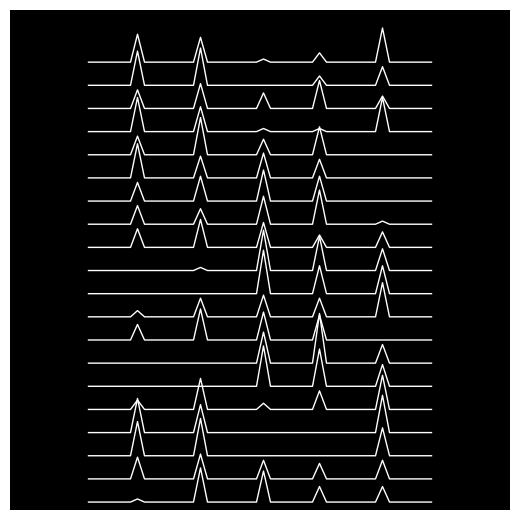

In [253]:
%matplotlib inline


### settings
n_classes = 5
n_samples = 20 # 100
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values('target')

    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=False, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=50
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        a.set_xlim([-2,6])      
    plt.show()

        

In [48]:
df.sort_values(["target"])

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost
7570,0.196249,0.205741,0.111338,0.226124,0.260548,4,0,100,30,11,adaboost
7544,0.247730,0.259712,0.079736,0.140546,0.272275,4,0,118,4,11,adaboost
7541,0.206372,0.206372,0.237788,0.237788,0.111680,2,0,708,1,11,adaboost
4528,0.268182,0.268182,0.127034,0.160446,0.176155,0,0,118,4,7,adaboost
...,...,...,...,...,...,...,...,...,...,...,...
6765,0.305733,0.335530,0.010261,0.012947,0.335530,1,4,339,733,9,adaboost
6759,0.324577,0.324577,0.013744,0.012524,0.324577,0,4,211,727,9,adaboost
6755,0.200431,0.200431,0.191324,0.166413,0.241401,4,4,226,723,9,adaboost
2251,0.006225,0.016013,0.397816,0.503816,0.076130,3,4,316,743,3,adaboost


model_name=averaging


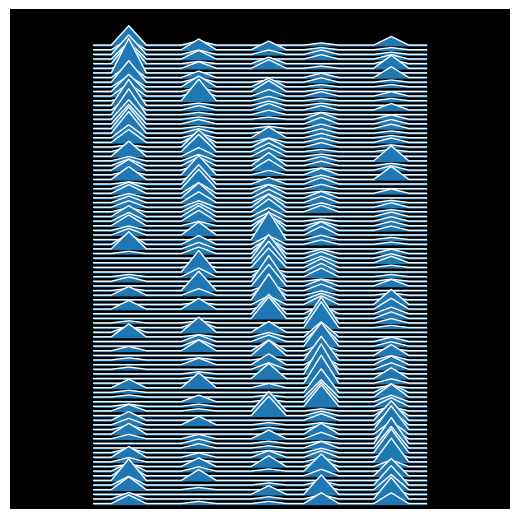

model_name=bagging


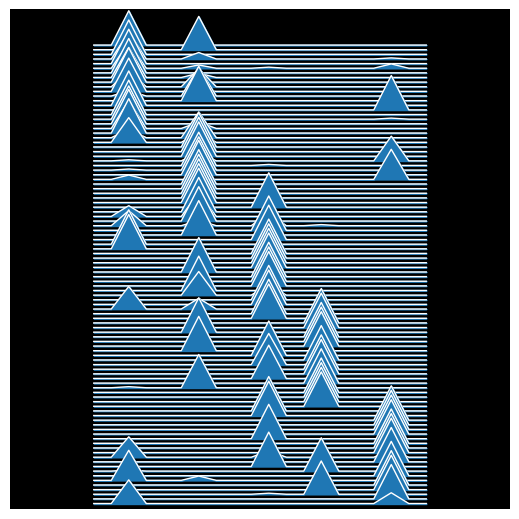

model_name=adaboost


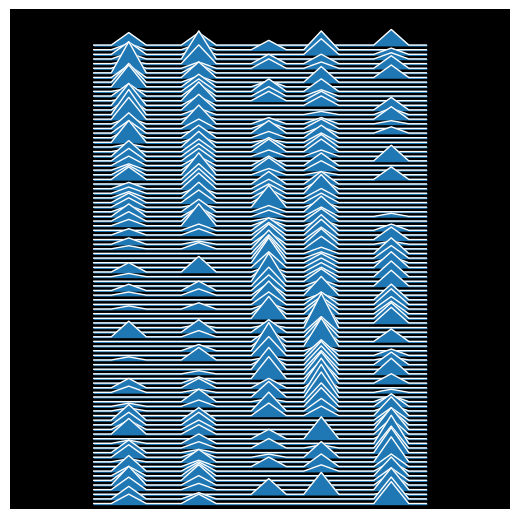

In [123]:
%matplotlib inline


### settings
n_classes = 5
n_samples = 100
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=True, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=20
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        a.set_xlim([-2,6])      
    plt.show()



## Plot heatmaps instead

model_name=averaging


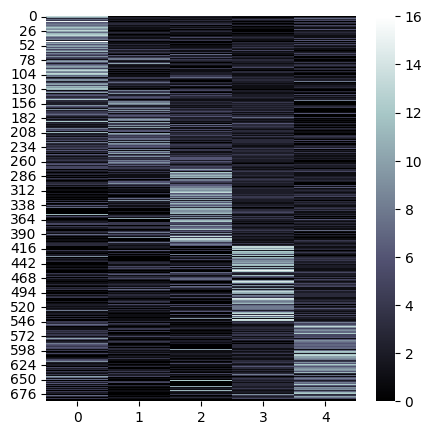

model_name=bagging_independent


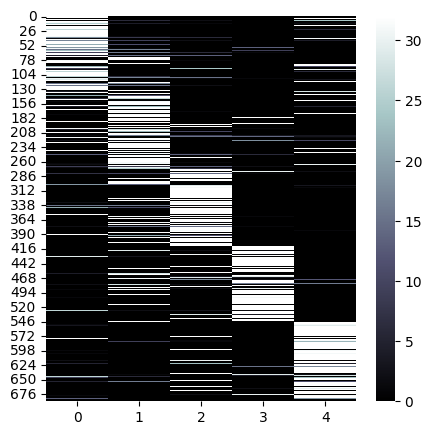

model_name=adaboost_independent


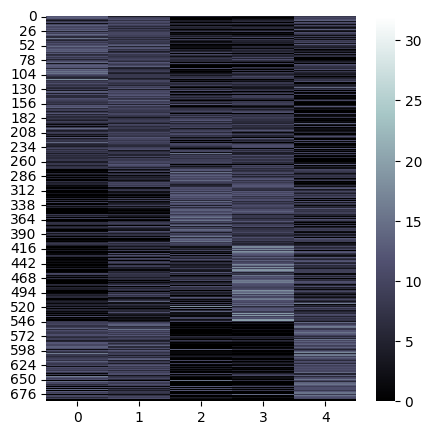

In [256]:
%matplotlib inline


### settings
n_classes = 5
n_samples = 689
n_samples_per_class = n_samples//n_classes

np.random.seed(0)


### define which samples to use
# loop over n_classes and sample from each
use_samples = []
for target in range(n_classes):
    df_target = df_results.loc[df_results.target.isin([target])]
    target_samples = df_target.sample_index.unique()
    use_samples += list(sorted(np.random.choice(target_samples, n_samples_per_class, replace=False)))


### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    # np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values("target")
    # df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_samples))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)


    # TODO: there's gotta be a better way to do this 
    rows = np.zeros((n_samples, n_classes))
    for i, sample_index in enumerate(use_samples):

        # select all member predictions for given sample
        df_sample = df.set_index("sample_index").loc[sample_index]

        # count number of predictions per classs
        for prediction in df_sample.prediction.values:
            rows[i, prediction] += 1

    # show rows (use max model index across all methods)
    # sns.heatmap(rows, cmap='bone', cbar=True, figure=plt.figure(figsize=(5,5)), vmin=0, vmax=df_results.model_index.max())
    # plt.show()
    
    # show rows (use methods max model index)
    sns.heatmap(rows, cmap='bone', cbar=True, figure=plt.figure(figsize=(5,5)), vmin=0, vmax=df.model_index.max())
    plt.show()


## Disagreement Rate

model_name=averaging
	mean(d_ave)=0.017381258289124672, mean(d_sum)=209.6875)


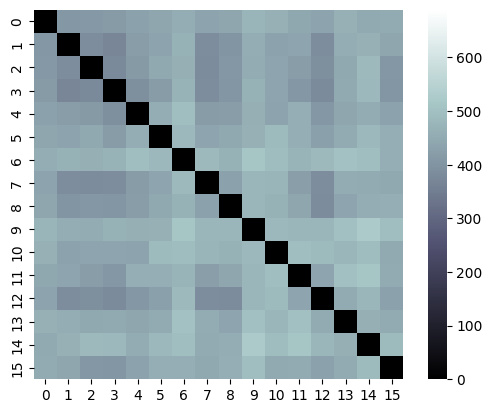

model_name=bagging_independent
	mean(d_ave)=0.0009902427936422415, mean(d_sum)=23.892578125)


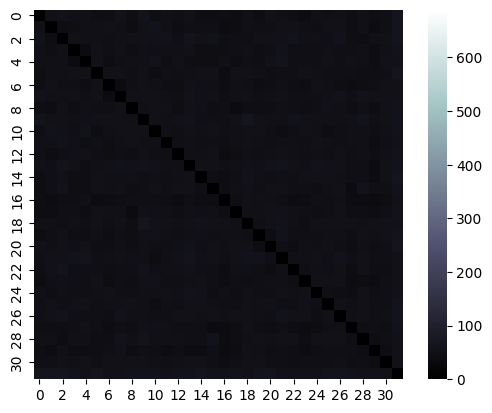

model_name=adaboost_independent
	mean(d_ave)=0.01009083553081482, mean(d_sum)=243.4716796875)


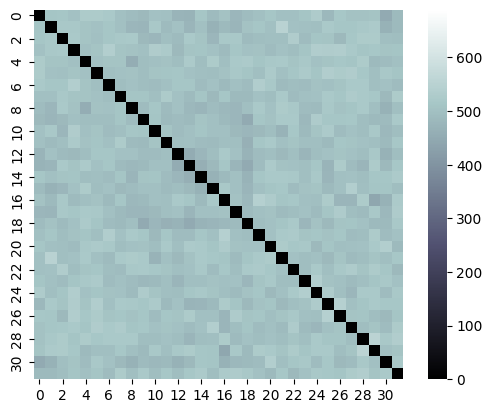

In [257]:

### do plotting for each model
# loop over models 
for model_name in model_names:
        
    print(f"model_name={model_name}")
    
    
    # all samples
    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    # df = df.loc[df.sample_index.isin(use_samples)]
    df = df.sort_values("target")

    
    n_models = len(df.model_index.unique())

    # TODO: there's gotta be a better way to do this 
    disagreement = np.zeros((len(df), n_models, n_models))
    for i, sample_index in enumerate(use_samples):

        # select all member predictions for given sample
        df_sample = df.set_index("sample_index").loc[sample_index]

        # count number of predictions per classs
        for j,prediction_j in enumerate(df_sample.prediction.values):
            for k,prediction_k in enumerate(df_sample.prediction.values):
                #print(j,k,prediction_j, prediction_k )
                disagreement[i, j, k] = 1*(prediction_j != prediction_k)
    

    # compute average disagreement over samples
    disagreement_sum = np.sum(disagreement, axis=0)
    disagreement_ave = np.mean(disagreement, axis=0)
    print(f"\tmean(d_ave)={np.mean(np.triu(disagreement_ave,1))}, mean(d_sum)={np.mean(np.triu(disagreement_sum,1))})")
          
    sns.heatmap(disagreement_sum, vmin=0, vmax=n_samples, cmap="bone", square=True)
    plt.show()
          
